In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg
from scipy import fft

import sys
sys.path.insert(0,'..')
import specsens as ss

In [10]:
sample_freq = 1e6  # in Hz
length = 0.1  # in s
signal_power = 0.0  # in dB
noise_power = 0.0  # in dB

# create the signal
wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length)
sig = wm.get_soft(f_center=1e5, power=signal_power, dB=True)

# create the noise
wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length)
noise = wgn.get_signal(power=noise_power, dB=True)

# ensure noise and signal have same length
assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

# create actual signal ('both') comprising of signal and additive white gaussian noise (AWGN)
both = sig + noise

# print some info about signal and noise
print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num samples:  %d ' % (num_samples))

# note, that Parseval's theorem holds
print("Freq energy:  %.2f" % (np.sum(np.abs(fft.fft(both))**2)/sample_freq))
print("Time energy:  %.2f" % (np.sum(np.abs(both)**2 * length)))

Signal power: -0.00 dB
Noise power:  -0.01 dB
SNR:          0.01 dB
Num samples:  100000 
Freq energy:  19984.06
Time energy:  19984.06


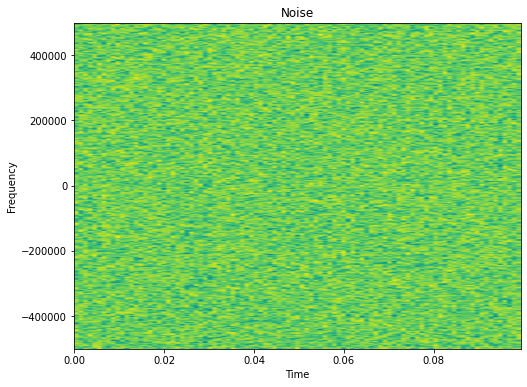

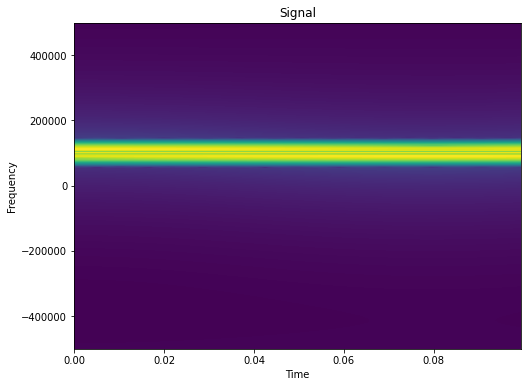

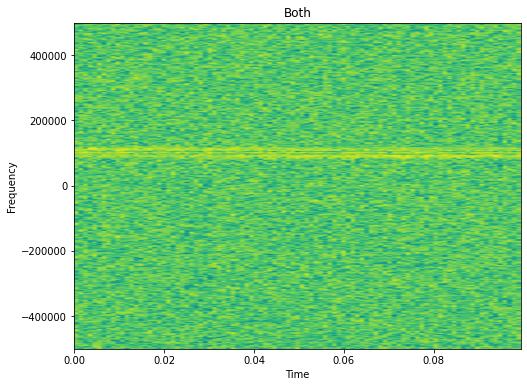

In [46]:
# Plot the resulting signals using matplotlib
nfft = 1024

plt.figure(figsize=(8, 6))
plt.specgram(noise,
             NFFT=nfft,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', nfft))
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(sig,
             NFFT=nfft,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', nfft))
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(both,
             NFFT=nfft,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', nfft))
plt.title("Both")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [11]:
def cal(y, l):
    y = np.reshape(y, (-1, 1))
    r = np.zeros((l, l), dtype = np.complex128)
    for i in range(0, len(y)-l):
        r += np.dot(y[i:i+l], y[i:i+l].conj().T)
    return r / (len(y)-l)

l = 100
c_sig = cal(sig, l)
c_noise = cal(noise, l)
c_both = cal(both, l)

# plt.imshow(abs(c_sig))
# plt.colorbar()
# plt.show()

# plt.imshow(abs(c_noise))
# plt.colorbar()
# plt.show()

# plt.imshow(abs(c_both))
# plt.colorbar()
# plt.show()

# def test1(x):
#     t1 = x.sum()
#     t2 = x.trace()
#     return t1/t2

def test2(x):
    eig = linalg.eigvals(x)
    eig_max = np.abs(np.max(eig))
    eig_min = np.abs(np.min(eig))
    return eig_max/eig_min
    
print(f"Noise only: {test2(c_noise)}")
print(f"Noise and signal: {test2(c_both)}")
print(f"Diff: {test2(c_both)-test2(c_noise)}")

Noise only: 1.1402017747450752
Noise and signal: 36.51657984068144
Diff: 35.376378065936365


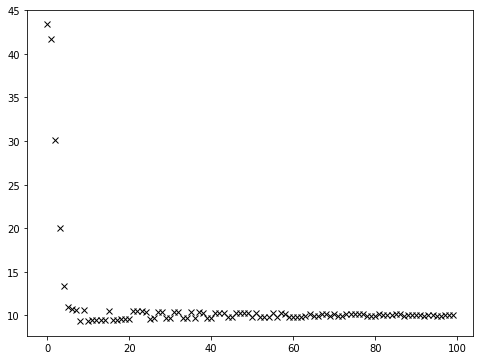

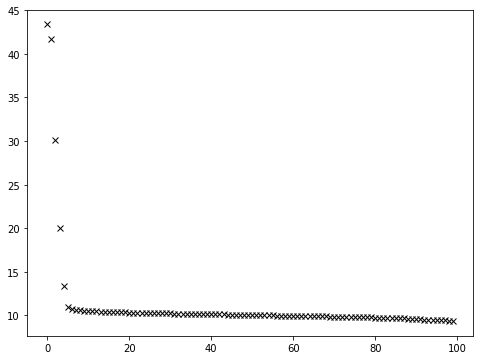

In [48]:
# plt.figure(figsize=(8, 6))
# plt.plot(np.abs(linalg.eigvals(c_noise)), 'kx')
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(np.abs(linalg.eigvals(c_both)), 'kx')
# plt.show()

plt.figure(figsize=(8, 6))
plt.plot(np.abs(linalg.eigvals(c_both)), 'kx')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(linalg.svd(c_both, compute_uv=False), 'kx')
plt.show()